In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [131]:
df = pd.read_csv('/content/INFY.NS.csv')

In [132]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-04-01,180.637497,183.000000,176.274994,177.881256,131.290665,6289208.0
1,2008-04-02,184.375000,187.375000,183.125000,185.350006,136.803192,11152080.0
2,2008-04-03,183.762497,191.250000,183.762497,190.312500,140.465866,9778160.0
3,2008-04-04,183.875000,190.875000,179.000000,185.681244,137.047668,8028032.0
4,2008-04-07,187.375000,191.050003,184.531250,186.506256,137.656601,16097184.0


In [133]:
data = df.sort_index(ascending=True, axis=0)
data.fillna(method="bfill",inplace=True) 
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

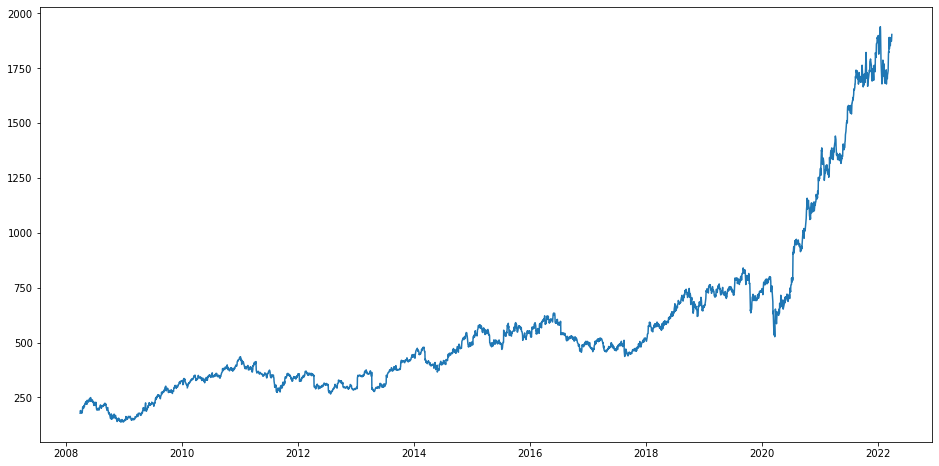

In [134]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [135]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-04-01,180.637497,183.000000,176.274994,177.881256,131.290665,6289208.0
1,2008-04-02,184.375000,187.375000,183.125000,185.350006,136.803192,11152080.0
2,2008-04-03,183.762497,191.250000,183.762497,190.312500,140.465866,9778160.0
3,2008-04-04,183.875000,190.875000,179.000000,185.681244,137.047668,8028032.0
4,2008-04-07,187.375000,191.050003,184.531250,186.506256,137.656601,16097184.0
...,...,...,...,...,...,...,...
3450,2022-03-24,1856.150024,1894.599976,1856.150024,1886.699951,1866.928345,3784303.0
3451,2022-03-25,1892.000000,1894.000000,1858.000000,1876.550049,1856.884888,3438588.0
3452,2022-03-28,1866.000000,1880.900024,1852.650024,1873.900024,1854.262573,4008555.0
3453,2022-03-29,1873.900024,1889.400024,1860.550049,1886.000000,1866.235718,3917785.0


In [136]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3455.000000,3455.000000,3455.000000,3455.000000,3455.000000,3.455000e+03
mean,570.834874,577.198385,564.528014,570.903421,507.072881,9.508469e+06
std,375.205038,378.823394,371.681350,375.260439,386.331556,8.061142e+06
min,137.875000,139.949997,130.000000,137.787506,103.947334,0.000000e+00
25%,341.321884,344.821884,337.534378,341.706253,265.169922,5.655468e+06
50%,475.799988,480.549988,471.424988,475.937500,407.388885,7.598848e+06
75%,660.975006,669.350006,649.212494,658.524994,603.737609,1.081280e+07
max,1938.550049,1953.900024,1930.500000,1939.500000,1919.175049,1.663204e+08


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3455 entries, 0 to 3454
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3455 non-null   object 
 1   Open       3455 non-null   float64
 2   High       3455 non-null   float64
 3   Low        3455 non-null   float64
 4   Close      3455 non-null   float64
 5   Adj Close  3455 non-null   float64
 6   Volume     3455 non-null   float64
dtypes: float64(6), object(1)
memory usage: 189.1+ KB


In [138]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:2898,:]
valid = dataset[2898:,:]

In [139]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=15, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=15))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)


inputs = new_data[len(new_data) - len(valid) - 90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


18/18 [==============================] - 1s 16ms/step


In [140]:
closing_price

array([[ 684.2814 ],
       [ 685.76843],
       [ 686.8878 ],
       [ 686.5047 ],
       [ 684.34265],
       [ 682.51953],
       [ 682.2351 ],
       [ 686.61206],
       [ 693.145  ],
       [ 699.1589 ],
       [ 704.127  ],
       [ 708.0447 ],
       [ 711.0033 ],
       [ 712.4532 ],
       [ 713.7676 ],
       [ 716.3804 ],
       [ 719.17615],
       [ 721.22125],
       [ 722.6145 ],
       [ 724.7682 ],
       [ 726.07947],
       [ 726.27765],
       [ 724.9456 ],
       [ 725.1988 ],
       [ 725.89307],
       [ 725.307  ],
       [ 724.77826],
       [ 723.9066 ],
       [ 723.00757],
       [ 723.02527],
       [ 724.744  ],
       [ 726.5232 ],
       [ 728.4545 ],
       [ 731.1318 ],
       [ 734.18475],
       [ 736.69275],
       [ 738.489  ],
       [ 739.97327],
       [ 739.40955],
       [ 737.31165],
       [ 729.6642 ],
       [ 721.0712 ],
       [ 713.6665 ],
       [ 709.0421 ],
       [ 705.98553],
       [ 702.4428 ],
       [ 695.38025],
       [ 685.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[]

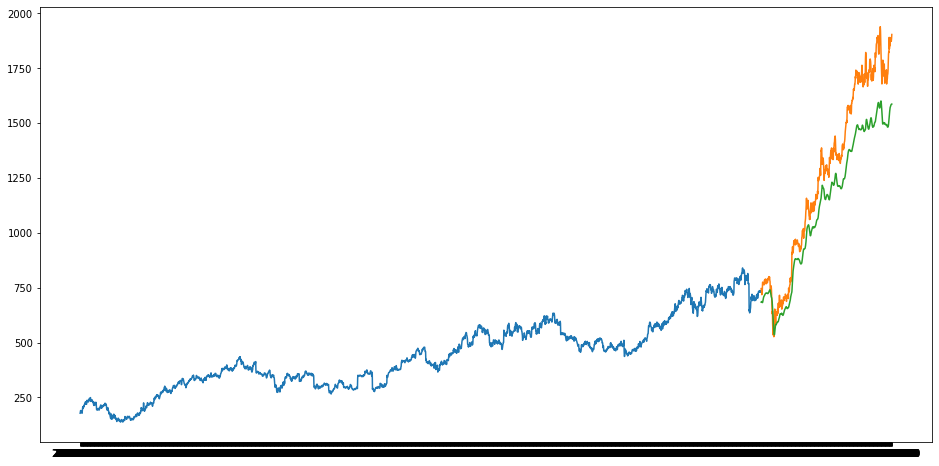

In [141]:
train = new_data[:2898]
valid = new_data[2898:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.plot()  

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f' % mean_squared_error(closing_price, valid['Close']))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(closing_price, valid['Close']))

Mean squared error: 28587.86
Coefficient of determination: 0.73
